# Tutorial 3: Example of system of pdes

Let's consider the following weak formulation

$$
  \int_{\Omega} \nabla v_1 \cdot \nabla u_1 + \partial_x v_1 \partial_y u_2 ~d\Omega = \ldots 
  \\
  \int_{\Omega} \partial_y v_2 \partial_x u_1  ~d\Omega  = \ldots 
$$

where $\Omega$ is the unit square, the trial function is $(u_1, u_2)$ while the test function is $(v_1, v_2)$. Here, we consider that every component lives in a discrete subspace of $H^1(\Omega)$.

In [20]:
from glt.expression import glt_symbol

discretization = {"n_elements": [16, 16], "degrees": [2,2]}

In order to define the symbol, we use a dictionary as the following

In [27]:
d_expr = {}
d_expr[0,0] = "Ni_x * Nj_x + Ni_y * Nj_y"
d_expr[0,1] = "Ni_x * Nj_y"
d_expr[1,0] = "Ni_y * Nj_x"

We create the symbol without **evaluation**

In [29]:
expr = glt_symbol(d_expr, dim=2, \
                  verbose=False, evaluate=False, \
                  discretization=discretization)

>>>> key : (0, 1)
>>>> key : (1, 0)
>>>> key : (0, 0)


Let's print it

In [30]:
from glt.expression import glt_latex
from IPython.display import Math

Math(glt_latex(expr))

<IPython.core.display.Math object>

As you can see, the result is a matrix (the symbol is then called a **multilevel** symbol).

In the case of a multilevel symbol, the eigenvalues of the previous matrix can be evaluated on a uniform grid, to get an approximation of the eigenvalues of the linear system associated to our weak formulation.
Let's first compute the eigenvalues of our **multilevel** symbol

In [8]:
eigs = expr.eigenvals()

In [11]:
from sympy import latex

Math(latex(eigs))

<IPython.core.display.Math object>

This means that there are 2 eigenvalues of multiplicity 1.

Let's again use a pretty printing

In [14]:
from glt.printing.latex import glt_latex_names

Math(latex(eigs, symbol_names=glt_latex_names()))

<IPython.core.display.Math object>

Now, let's turn on the **evaluate** flag and do some diagnostics

In [31]:
expr = glt_symbol(d_expr, dim=2, \
                  verbose=False, evaluate=True, \
                  discretization=discretization)

>>>> key : (0, 1)
>>>> key : (1, 0)
>>>> key : (0, 0)


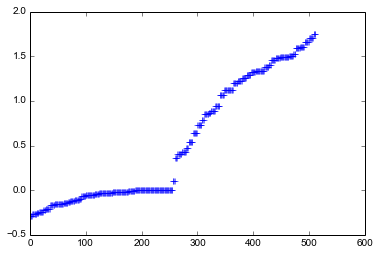

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

from glt.expression import glt_plot_eigenvalues

glt_plot_eigenvalues(expr, discretization)